# **Hypothesis Testing**

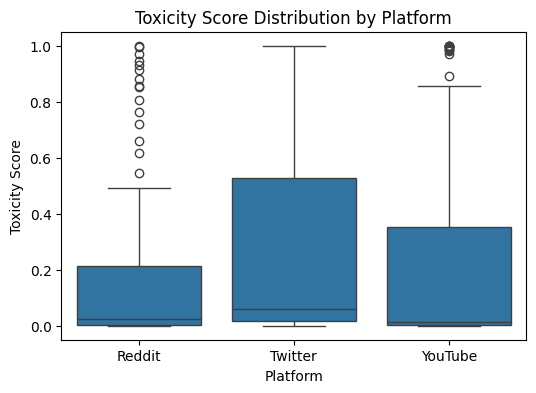

Bonferroni-corrected alpha: 0.0167

Comparing Reddit vs Twitter
  t-statistic: -2.7970
  p-value:     0.005816
  ➜ Significant difference (after Bonferroni correction)
--------------------------------------------------
Comparing Reddit vs YouTube
  t-statistic: -1.3412
  p-value:     0.181532
  ➜ NOT statistically significant
--------------------------------------------------
Comparing Twitter vs YouTube
  t-statistic: 1.3283
  p-value:     0.185752
  ➜ NOT statistically significant
--------------------------------------------------


In [ ]:
# -------------------------------
# Hypothesis Testing: Toxicity Score Across Platforms
# -------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from itertools import combinations

# Step 1: Load cleaned datasets
reddit_df  = pd.read_csv("reddit_cleaned.csv")
twitter_df = pd.read_csv("twitter_cleaned.csv")
youtube_df = pd.read_csv("youtube_cleaned.csv")

# Step 2: Select relevant columns and unify
reddit_tox  = reddit_df[["Platform", "toxicity_score"]].copy()
twitter_tox = twitter_df[["Platform", "toxicity_score"]].copy()
youtube_tox = youtube_df[["Platform", "toxicity_score"]].copy()

tox_all = pd.concat([reddit_tox, twitter_tox, youtube_tox], ignore_index=True)

# Step 3: Visualize toxicity distribution
plt.figure(figsize=(6,4))
sns.boxplot(data=tox_all, x="Platform", y="toxicity_score")
plt.title("Toxicity Score Distribution by Platform")
plt.ylabel("Toxicity Score")
plt.show()

# Step 4: Extract scores per platform
platform_data = {
    platform: tox_all[tox_all["Platform"] == platform]["toxicity_score"].dropna()
    for platform in tox_all["Platform"].unique()
}

# Step 5: Define function for t-test with Bonferroni correction
def run_hypothesis_tests(data_dict, alpha=0.05):
    """
    Conduct pairwise Welch t-tests across platforms with Bonferroni correction.
    Prints results in English only.
    """
    pairs = list(combinations(data_dict.keys(), 2))
    alpha_bonf = alpha / len(pairs)
    print(f"Bonferroni-corrected alpha: {alpha_bonf:.4f}\n")

    for p1, p2 in pairs:
        scores1 = data_dict[p1]
        scores2 = data_dict[p2]

        t_stat, p_val = ttest_ind(scores1, scores2, equal_var=False)

        print(f"Comparing {p1} vs {p2}")
        print(f"  t-statistic: {t_stat:.4f}")
        print(f"  p-value:     {p_val:.6f}")

        # Interpretation
        if p_val < alpha_bonf:
            decision = "Significant difference (after Bonferroni correction)"
        elif p_val < alpha:
            decision = "Significant at 0.05, but NOT after correction"
        else:
            decision = "NOT statistically significant"

        print(f"  ➜ {decision}")
        print("-"*50)

# Step 6: Run the hypothesis tests
run_hypothesis_tests(platform_data)
